In [1]:
#data manipulation and data analysis
import pandas as pd

#advanced mathematical operations
import numpy as np

#graphs to plot data
from matplotlib import pyplot as plt


In [2]:
#dara visualization library
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
# load the data set

data = pd.read_csv("Countries.csv")

In [4]:
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [5]:
data.shape


(241, 3)

In [6]:
#describe the logitude column
data['Longitude'].describe()

count    241.000000
mean      14.215380
std       72.013654
min     -177.348348
25%      -36.433184
50%       18.644925
75%       47.587005
max      171.484924
Name: Longitude, dtype: float64

In [7]:
#plotting the data

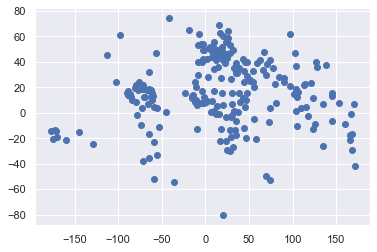

In [8]:
plt.scatter(data['Longitude'], data['Latitude'])

In [9]:
#Selecting the features
#extract data from a data frame
#without the name column

In [10]:
#extract data from a data frame
cdata=data.iloc[:,1:3]

#":" show that we  need all the rows from the old data set"data"  to the new data set "cdata"

In [11]:
cdata.head()


,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450


In [12]:
cdata.shape

(241, 2)

In [13]:
#Clustering

In [14]:
kmeans = KMeans(2)

In [15]:
kmeans.fit(cdata)

KMeans(n_clusters=2)

In [16]:
identified_clusters = kmeans.fit_predict(cdata)

In [17]:
identified_clusters

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [18]:
#length of this array
len(identified_clusters)

241

In [19]:
country_cluster=data.copy()

In [20]:
country_cluster

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [21]:
country_cluster['ClusterNo']=identified_clusters

In [22]:
country_cluster

,name,Longitude,Latitude,ClusterNo
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,0
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


In [23]:
#Clustering results

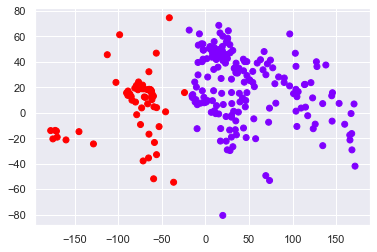

In [24]:
plt.scatter(country_cluster['Longitude'],country_cluster['Latitude'],c=country_cluster['ClusterNo'],cmap = 'rainbow')

In [25]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(cdata)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [26]:
wcss

[1413859.6798344278,
 657012.0797586322,
 325235.522370559,
 256573.08675934304,
 192194.98290025242,
 152164.15221066383,
 127277.58292003977,
 103021.48914073556,
 84967.4172006829,
 76613.595369695]

Text(0, 0.5, 'Within-cluster Sum of Squares')

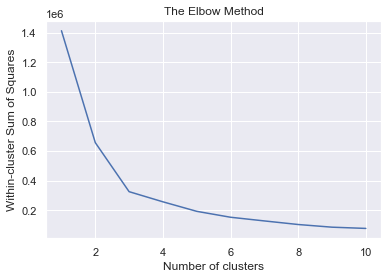

In [27]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')